# Набор данных о продажах электронной коммерции

https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data

### Анализ и максимизация эффективности онлайн-бизнеса

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Переменные

a = 1000000 # Размер строк для head

b = 20 # Переменная для размера графиков

In [92]:
# Укажите путь к файлу CSV
file_path = './5_Набор_данных_о_продажах_электронной_коммерции.csv'

# Исключить определенные столбцы при чтении файла CSV
input_raw = pd.read_csv(file_path, usecols=lambda col: col not in ['Unnamed: 22'])

# Преобразование колонки "Date" в формат datetime
input_raw['Date'] = pd.to_datetime(input_raw['Date'], format='%m-%d-%y')

input_raw.head(a)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [93]:
input_raw.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                  object
dtype: object

In [94]:
input_raw.describe()

,index,Date,Qty,Amount,ship-postal-code
count,128975.000000,128975,128975.000000,121180.000000,128942.000000
mean,64487.000000,2022-05-12 11:49:27.951928576,0.904431,648.561465,463966.236509
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32243.500000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64487.000000,2022-05-10 00:00:00,1.000000,605.000000,500033.000000
75%,96730.500000,2022-06-04 00:00:00,1.000000,788.000000,600024.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,37232.019822,NaN,0.313354,281.211687,191476.764941


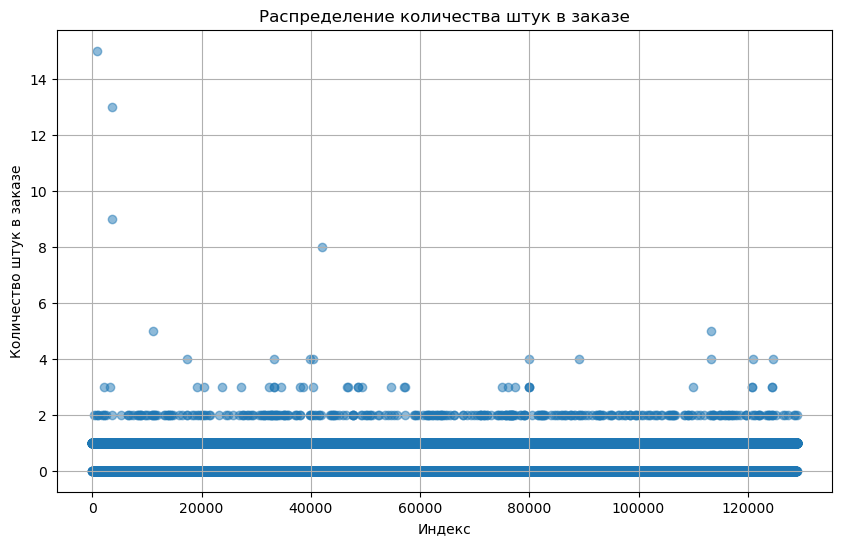

In [95]:
df = input_raw.copy(deep=True)

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Qty'], alpha=0.5)

plt.title('Распределение количества штук в заказе')
plt.xlabel('Индекс')
plt.ylabel('Количество штук в заказе')
plt.grid(True)
plt.show()

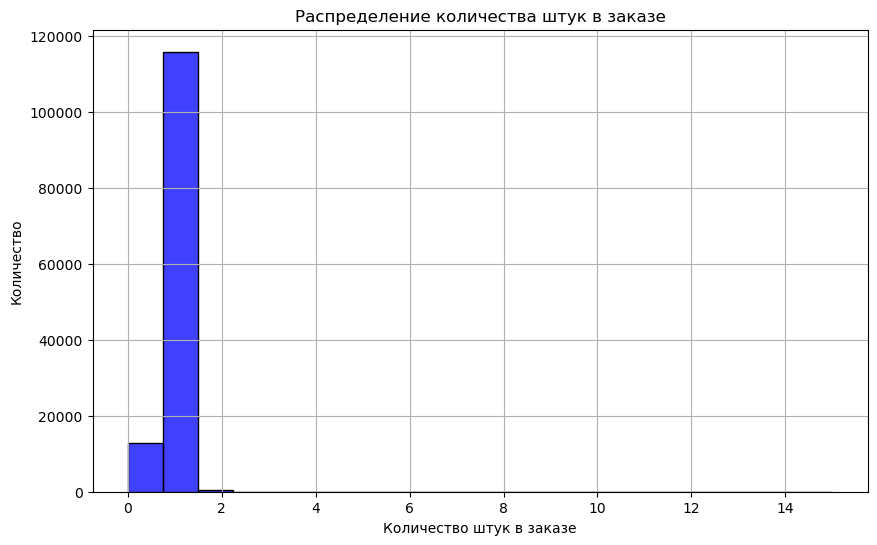

In [96]:
df = input_raw.copy(deep=True)

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(df['Qty'], bins=20, kde=False, color='blue')
plt.title('Распределение количества штук в заказе')
plt.xlabel('Количество штук в заказе')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

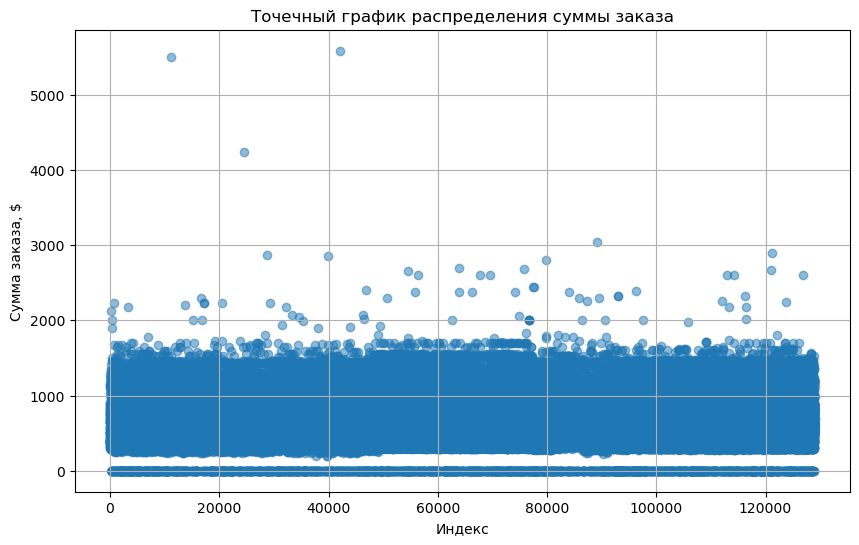

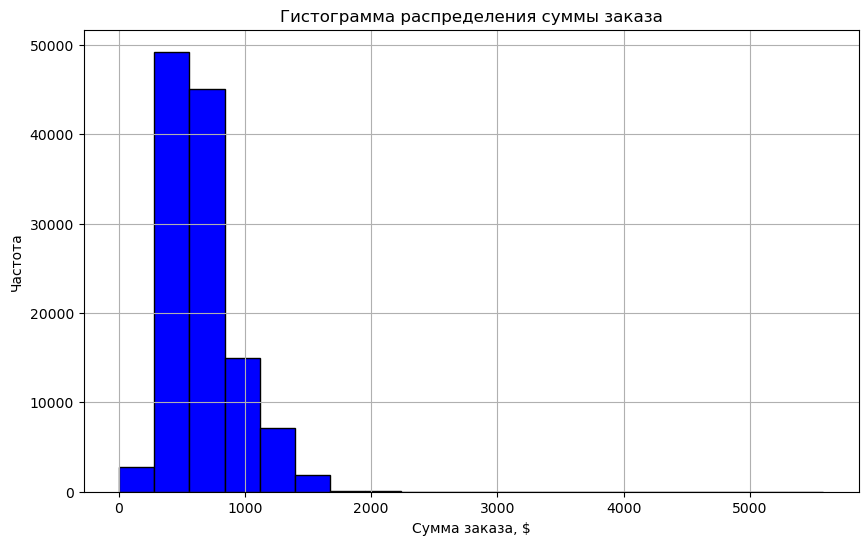

In [97]:
df = input_raw.copy(deep=True)
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Amount'], alpha=0.5)
plt.title('Точечный график распределения суммы заказа')
plt.xlabel('Индекс')
plt.ylabel('Сумма заказа, $')
plt.grid(True)
plt.show()

# Гистограмма
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=20, color='blue', edgecolor='black')
plt.title('Гистограмма распределения суммы заказа')
plt.xlabel('Сумма заказа, $')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

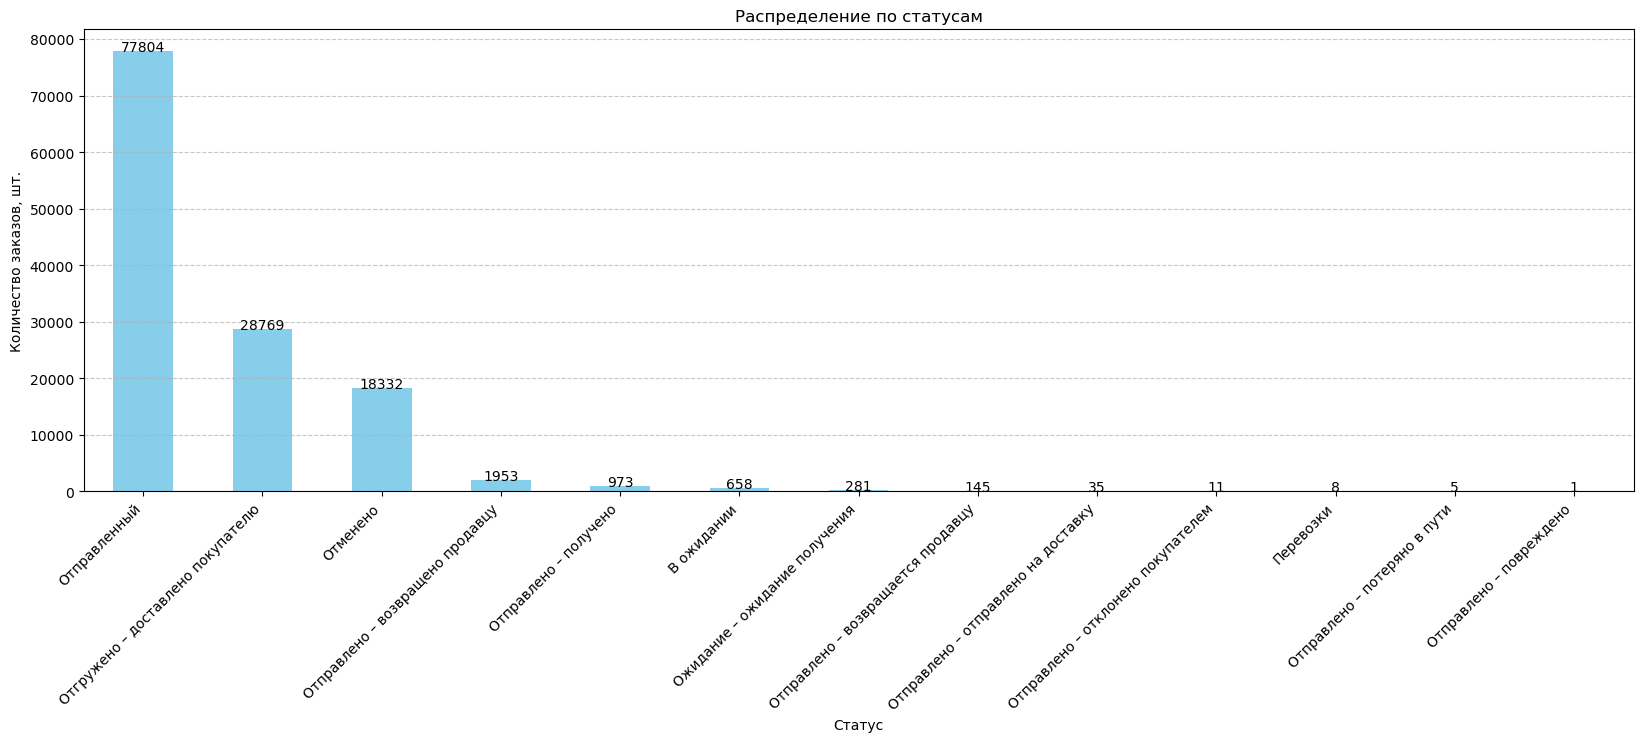

In [98]:
df = input_raw.copy(deep=True)

# Словарь соответствия английских и русских статусов
status_translation = {
    'Cancelled': 'Отменено',
    'Pending': 'В ожидании',
    'Pending - Waiting for Pick Up': 'Ожидание – ожидание получения',
    'Shipped': 'Отправленный',
    'Shipped - Damaged': 'Отправлено – повреждено',
    'Shipped - Delivered to Buyer': 'Отгружено – доставлено покупателю',
    'Shipped - Lost in Transit': 'Отправлено – потеряно в пути',
    'Shipped - Out for Delivery': 'Отправлено – отправлено на доставку',
    'Shipped - Picked Up': 'Отправлено – получено',
    'Shipped - Rejected by Buyer': 'Отправлено – отклонено покупателем',
    'Shipped - Returned to Seller': 'Отправлено – возвращено продавцу',
    'Shipped - Returning to Seller': 'Отправлено – возвращается продавцу',
    'Shipping': 'Перевозки'
}

# Преобразование статусов в русские
df['Status_Russian'] = df['Status'].map(status_translation)

# Группировка данных по статусам
status_counts = df['Status_Russian'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(b, b * 0.3))
bars = status_counts.plot(kind='bar', color='skyblue')

# Добавление аннотаций над столбиками
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 0.1, str(bar.get_height()), ha='center', color='black')

plt.title('Распределение по статусам')
plt.xlabel('Статус')
plt.ylabel('Количество заказов, шт.')
plt.xticks(rotation=45, ha='right')  # Поворот подписей оси x для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

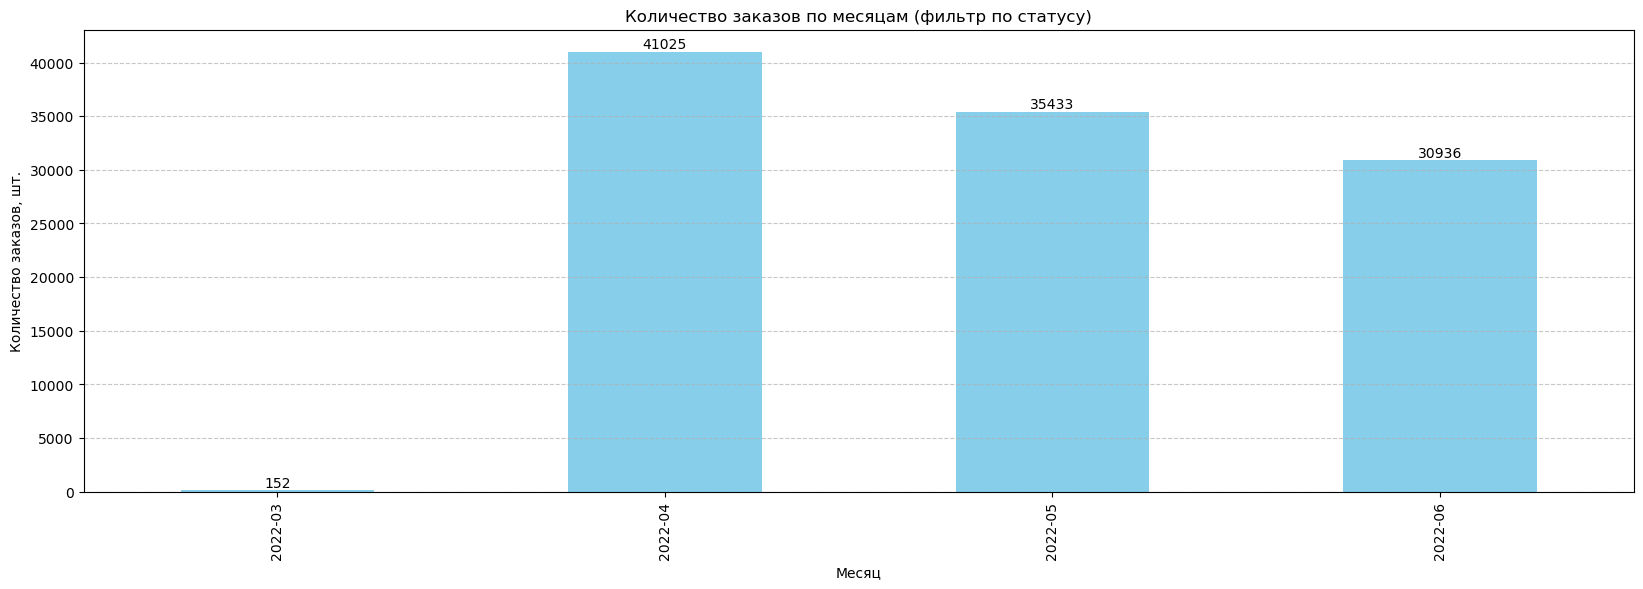

In [99]:
DF = input_raw.copy(deep=True)

DF['Month'] = DF['Date'].dt.to_period('M')
monthly_orders = DF.groupby('Month').size()

# Фильтр для столбца 'Status'
allowed_statuses = ['Shipped', 'Shipped - Delivered to Buyer', 'Shipped - Picked Up']
filtered_DF = DF[DF['Status'].isin(allowed_statuses)]

# Постройте столбчатую диаграмму для отфильтрованных данных
plt.figure(figsize=(b, b * 0.3))
bar_plot = filtered_DF.groupby('Month').size().plot(kind='bar', color='skyblue')
plt.title('Количество заказов по месяцам (фильтр по статусу)')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов, шт.')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавьте аннотации (количество заказов) над каждым столбиком
for i, value in enumerate(filtered_DF.groupby('Month').size()):
    bar_plot.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

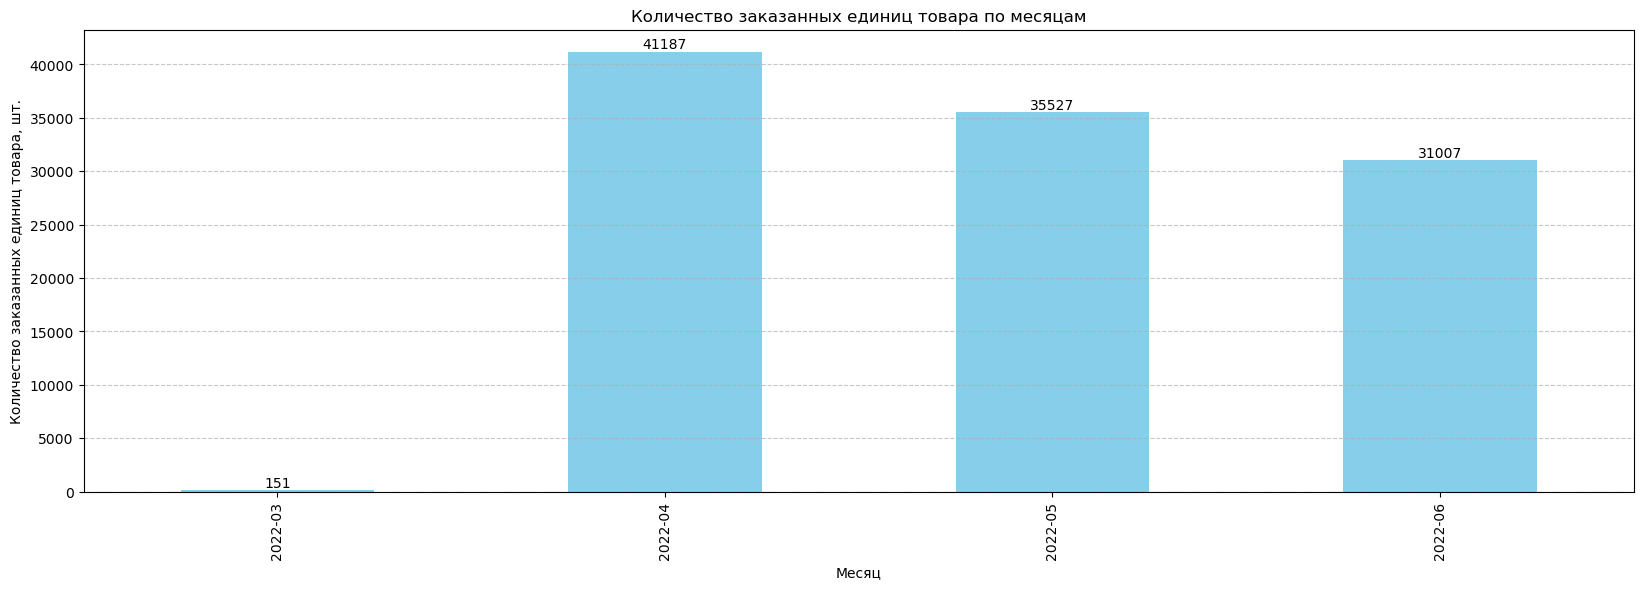

In [100]:
DF = input_raw.copy(deep=True)

# Фильтрация данных по значениям в колонке 'Status'
DF = DF[DF['Status'].isin(['Shipped', 'Shipped - Delivered to Buyer', 'Shipped - Picked Up'])]

# Создание нового столбца 'Month' с месяцем
DF['Month'] = DF['Date'].dt.to_period('M')

# Группировка данных по месяцам и суммирование количества заказов
monthly_orders = DF.groupby('Month')['Qty'].sum()

# Построение столбчатой диаграммы с добавлением значений над столбиками
plt.figure(figsize=(b, b * 0.3))
ax = monthly_orders.plot(kind='bar', color='skyblue')

# Добавление значений над столбиками
for i, v in enumerate(monthly_orders):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.title('Количество заказанных единиц товара по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказанных единиц товара, шт.')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

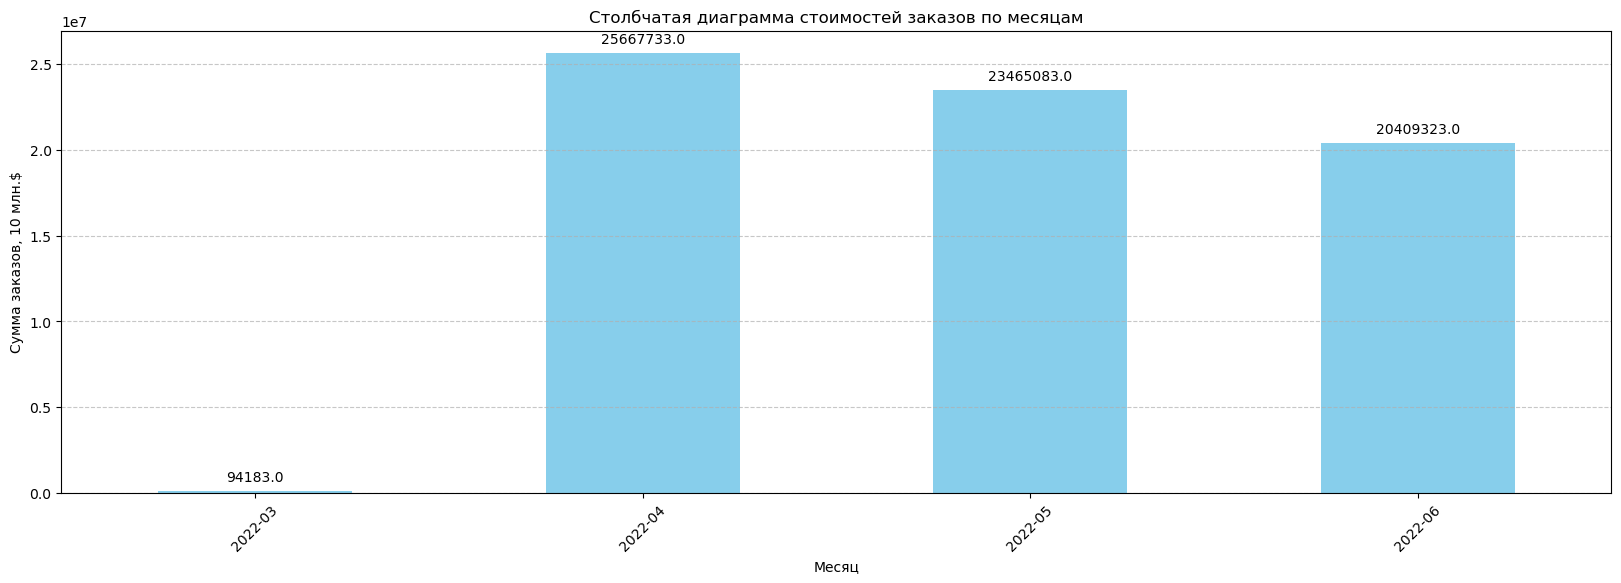

In [101]:
df = input_raw.copy(deep=True)

# Фильтрация данных по значениям в колонке 'Status'
filtered_df = df[df['Status'].isin(['Shipped', 'Shipped - Delivered to Buyer', 'Shipped - Picked Up'])].copy()

# Добавление нового столбца 'Month' для хранения месяца из столбца 'Date'
filtered_df['Month'] = filtered_df['Date'].dt.to_period('M')

# Группировка данных по месяцам и суммирование стоимости заказов
monthly_sum = filtered_df.groupby('Month')['Amount'].sum()

# Построение столбчатой диаграммы
plt.figure(figsize=(b, b * 0.3))
ax = monthly_sum.plot(kind='bar', color='skyblue')

# Добавление значений суммы заказов над столбиками
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Столбчатая диаграмма стоимостей заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма заказов, 10 млн.$')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

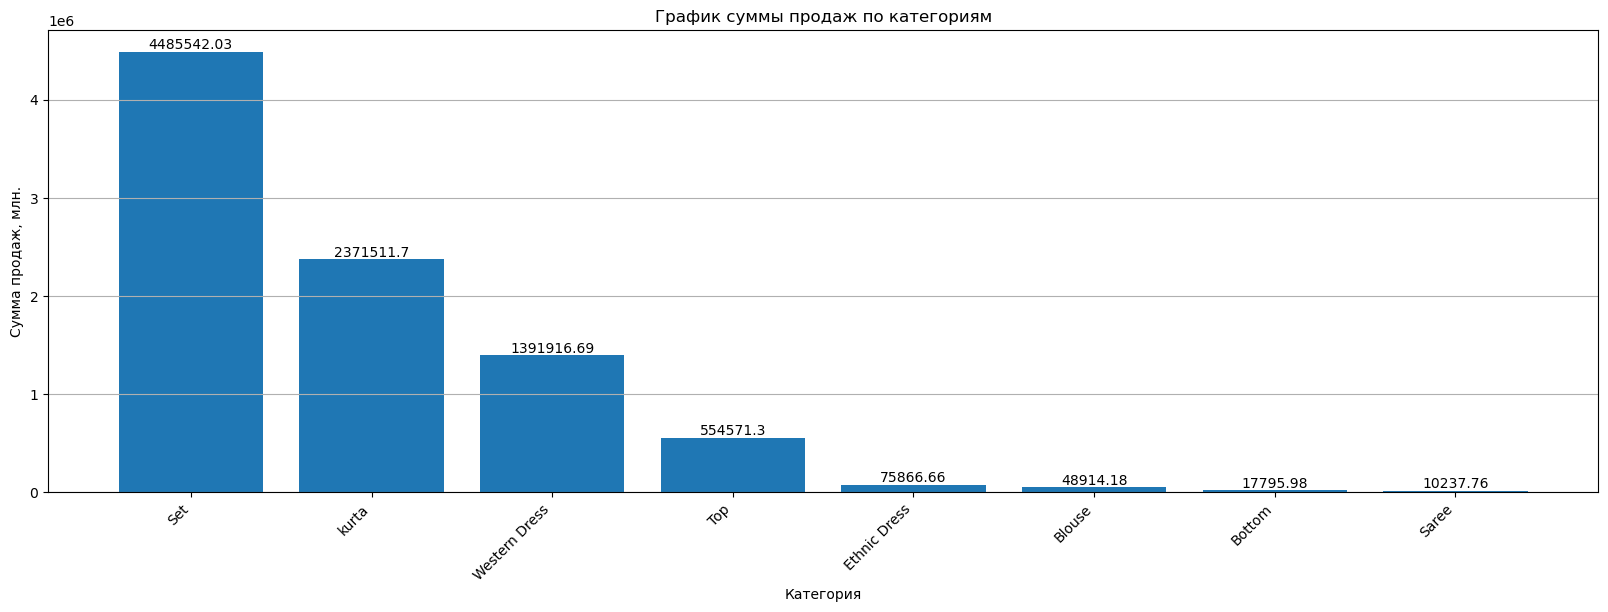

In [102]:
df = input_raw.copy(deep=True)

# Фильтрация строк по условию в колонке Status
filtered_df = df[~df['Status'].isin(['Shipped', 'Shipped - Delivered to Buyer', 'Shipped - Picked Up'])]

# Группировка по категориям и суммирование по колонке Amount
grouped_df = filtered_df.groupby('Category')['Amount'].sum().reset_index()

# Сортировка по убыванию суммы
grouped_df = grouped_df.sort_values(by='Amount', ascending=False)

# Построение столбчатого графика
plt.figure(figsize=(b, b * 0.3))
plt.bar(grouped_df['Category'], grouped_df['Amount'])
plt.xlabel('Категория')
plt.ylabel('Сумма продаж, млн.')
plt.title('График суммы продаж по категориям')
plt.xticks(rotation=45, ha='right')  # Подписи оси x под углом 45 градусов
plt.grid(axis='y')  # Включаем горизонтальную сетку

# Добавляем значения суммы над столбиками
for i, value in enumerate(grouped_df['Amount']):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()